Nombre: José Eyzaguirre

Curso:Machine Learning (b2b-sonda-ds-mayo-2025)

In [1]:
# 1️⃣ Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar visualizaciones más bonitas
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 2️⃣ Cargar el dataset
# Cambia la ruta si lo colocas en otra carpeta
df = pd.read_csv('SuperMarket Analysis.csv')

# 3️⃣ Mostrar las primeras filas para entender la estructura
print(df.head())

# 4️⃣ Revisar la información básica de las columnas
print("\nInformación del dataset:")
print(df.info())

# 5️⃣ Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())

# 6️⃣ Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.1415   
1  10:29

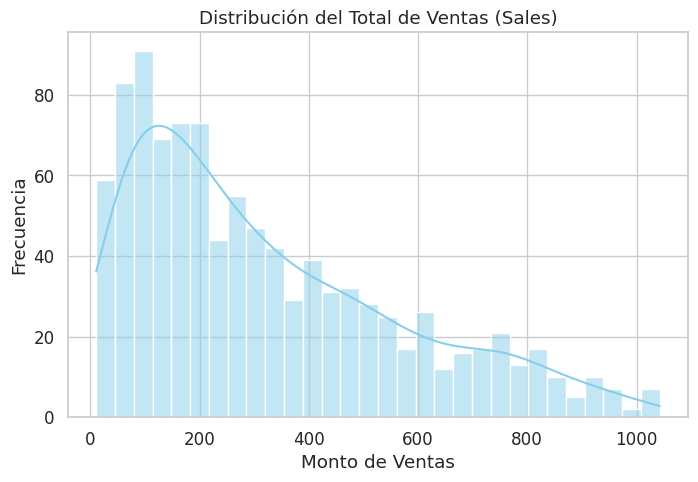

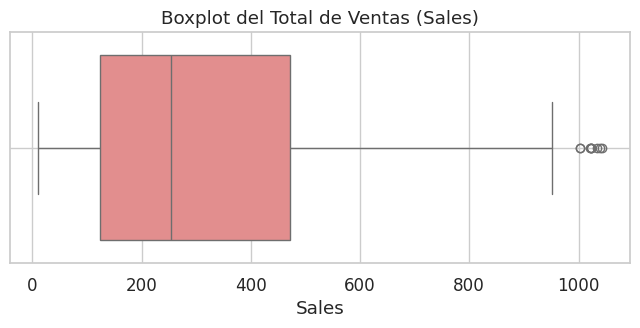

In [2]:
# Analizar la distribución de la variable 'Sales'
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], kde=True, color='skyblue', bins=30)
plt.title('Distribución del Total de Ventas (Sales)')
plt.xlabel('Monto de Ventas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot para ver posibles outliers
plt.figure(figsize=(8,3))
sns.boxplot(x=df['Sales'], color='lightcoral')
plt.title('Boxplot del Total de Ventas (Sales)')
plt.grid(True)
plt.show()


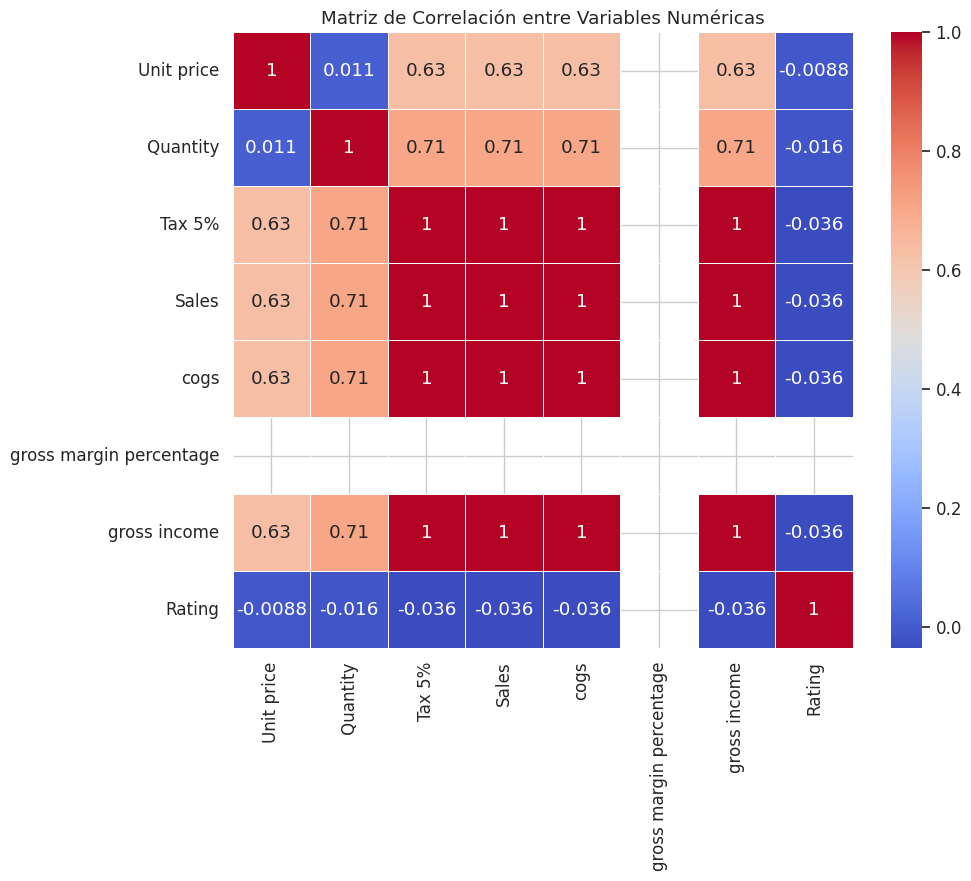

In [3]:
# Calcular matriz de correlación
corr = df.corr(numeric_only=True)  # numeric_only=True por columnas no numéricas

# Visualizar heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


/tmp/ipython-input-6-113388731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Sales', data=df, ax=axs[0,0], palette='pastel')
/tmp/ipython-input-6-113388731.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer type', y='Sales', data=df, ax=axs[0,1], palette='cool')
/tmp/ipython-input-6-113388731.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Payment', y='Sales', data=df, ax=axs[1,0], palette='Set2')
/tmp/ipython-input-6-113388731.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is dep

array([[<Axes: title={'center': 'Ventas por Género'}, xlabel='Gender', ylabel='Sales'>,
        <Axes: title={'center': 'Ventas por Tipo de Cliente'}, xlabel='Customer type', ylabel='Sales'>],
       [<Axes: title={'center': 'Ventas por Método de Pago'}, xlabel='Payment', ylabel='Sales'>,
        <Axes: xlabel='Branch', ylabel='Sales'>]], dtype=object)

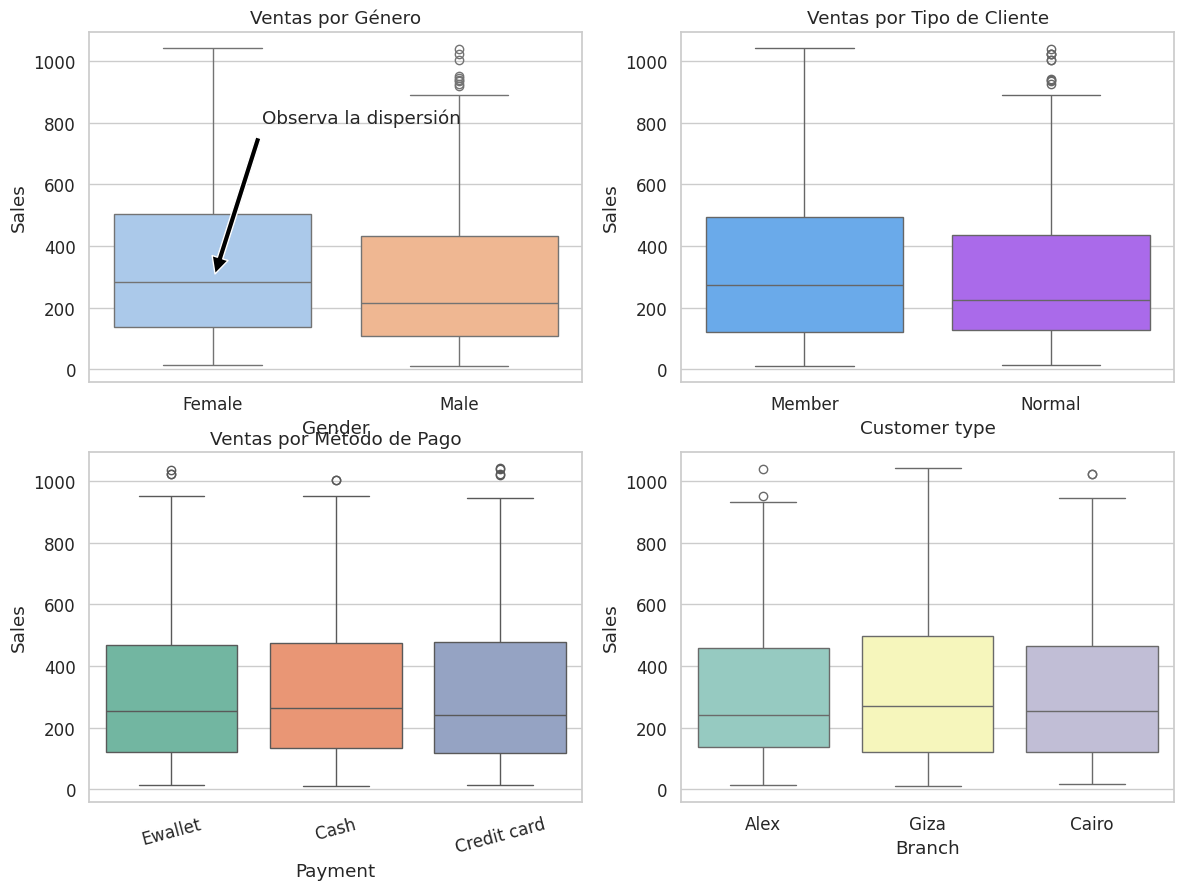

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Total de ventas por género
sns.boxplot(x='Gender', y='Sales', data=df, ax=axs[0,0], palette='pastel')
axs[0,0].set_title('Ventas por Género')
axs[0,0].annotate('Observa la dispersión',
                  xy=(0, df[df['Gender']=='Female']['Sales'].median()),
                  xytext=(0.2, 800),
                  arrowprops=dict(facecolor='black', shrink=0.05))

# Total de ventas por tipo de cliente
sns.boxplot(x='Customer type', y='Sales', data=df, ax=axs[0,1], palette='cool')
axs[0,1].set_title('Ventas por Tipo de Cliente')

# Total de ventas por forma de pago
sns.boxplot(x='Payment', y='Sales', data=df, ax=axs[1,0], palette='Set2')
axs[1,0].set_title('Ventas por Método de Pago')
axs[1,0].tick_params(axis='x', rotation=15)

# Total de ventas por sucursal
sns.boxplot(x='Branch', y='Sales', data=df, ax=axs[1,1], palette='Set3')
axs


In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1️⃣ Separar features y target
X = df.drop(['Sales', 'cogs', 'gross income', 'Tax 5%'], axis=1)
y = df['Sales']

# 2️⃣ Identificar columnas categóricas y numéricas
cat_features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
num_features = ['Unit price', 'Quantity', 'Rating']

# 3️⃣ Crear transformadores
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

# 4️⃣ Crear pipeline (ejemplo con modelo de regresión lineal)
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

# 5️⃣ Ajustar modelo
pipeline.fit(X, y)

print("Pipeline entrenado correctamente 🚀")


Pipeline entrenado correctamente 🚀


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np

# Lista de modelos
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', model)
    ])

    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    results[name] = {
        'Mean R2': np.mean(scores),
        'Std R2': np.std(scores)
    }

# Mostrar resultados
for name, metrics in results.items():
    print(f"🔍 {name}:")
    print(f"  R² promedio: {metrics['Mean R2']:.3f}")
    print(f"  Desviación estándar: {metrics['Std R2']:.3f}")
    print('---')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 16
[LightGBM] [Info] Start training from score 309.772825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 16
[LightGBM] [Info] Start training from score 321.292020
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Preparación de datos para clasificación


Identificar una columna adecuada para la clasificación binaria y preparar los datos (features `X` y target `y`) para modelos de clasificación.


In [9]:
# 1️⃣ Analizar columnas para identificar una variable binaria adecuada
# Las columnas 'Gender' y 'Customer type' son categóricas binarias.
# Elegiremos 'Gender' como variable objetivo para este ejemplo de clasificación binaria.
target_column = 'Gender'

# 2️⃣ Crear la nueva Serie 'y' con la columna objetivo binaria
y = df[target_column]

# 3️⃣ Actualizar el DataFrame 'X' eliminando la columna objetivo y las columnas relacionadas con ventas
# Asegurarse de que las columnas ya eliminadas ('Sales', 'cogs', 'gross income', 'Tax 5%')
# no causen error si se intentan eliminar de nuevo.
columns_to_drop = [target_column, 'Sales', 'cogs', 'gross income', 'Tax 5%']
X = df.drop(columns=columns_to_drop, errors='ignore')

# 4️⃣ Verificar que 'y' sea binaria y 'X' esté limpio
print(f"Columna objetivo seleccionada: '{target_column}'")
print("\nDistribución de la variable objetivo 'y':")
print(y.value_counts())
print("\nPrimeras filas del DataFrame de features 'X':")
print(X.head())
print("\nInformación del DataFrame de features 'X':")
print(X.info())

Columna objetivo seleccionada: 'Gender'

Distribución de la variable objetivo 'y':
Gender
Female    571
Male      429
Name: count, dtype: int64

Primeras filas del DataFrame de features 'X':
    Invoice ID Branch       City Customer type            Product line  \
0  750-67-8428   Alex     Yangon        Member       Health and beauty   
1  226-31-3081   Giza  Naypyitaw        Normal  Electronic accessories   
2  631-41-3108   Alex     Yangon        Normal      Home and lifestyle   
3  123-19-1176   Alex     Yangon        Member       Health and beauty   
4  373-73-7910   Alex     Yangon        Member       Sports and travel   

   Unit price  Quantity       Date         Time      Payment  \
0       74.69         7   1/5/2019   1:08:00 PM      Ewallet   
1       15.28         5   3/8/2019  10:29:00 AM         Cash   
2       46.33         7   3/3/2019   1:23:00 PM  Credit card   
3       58.22         8  1/27/2019   8:33:00 PM      Ewallet   
4       86.31         7   2/8/2019  10:37:00

## Entrenamiento y evaluación de modelos de clasificación


Entrenar y evaluar modelos de clasificación utilizando métricas relevantes como informe de clasificación, matriz de confusión y curva ROC/AUC.


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


cat_features = ['Branch', 'City', 'Customer type', 'Product line', 'Payment']
num_features = ['Unit price', 'Quantity', 'Rating']


preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_features)
])



models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

classification_results = {}


for name, model in models.items():
    print(f"Training and evaluating: {name}")
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])


    pipeline.fit(X_train, y_train)


    y_pred = pipeline.predict(X_test)


    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n")
    print(cm)



    if hasattr(model, 'predict_proba'):
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='Male')
        roc_auc = auc(fpr, tpr)
        print(f"AUC for {name}: {roc_auc:.3f}\n")
    else:
        fpr, tpr, roc_auc = None, None, None
        print(f"Model {name} does not support predict_proba.\n")



    classification_results[name] = {
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    }

    print("-" * 30)


Training and evaluating: Logistic Regression

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

      Female       0.57      0.77      0.66       111
        Male       0.50      0.29      0.37        89

    accuracy                           0.56       200
   macro avg       0.54      0.53      0.51       200
weighted avg       0.54      0.56      0.53       200

Confusion Matrix for Logistic Regression:

[[85 26]
 [63 26]]
AUC for Logistic Regression: 0.572

------------------------------
Training and evaluating: Random Forest

Classification Report for Random Forest:

              precision    recall  f1-score   support

      Female       0.58      0.75      0.66       111
        Male       0.52      0.34      0.41        89

    accuracy                           0.56       200
   macro avg       0.55      0.54      0.53       200
weighted avg       0.55      0.56      0.55       200

Confusion Matrix for Random Forest:

[[83

## Visualización de resultados de clasificación



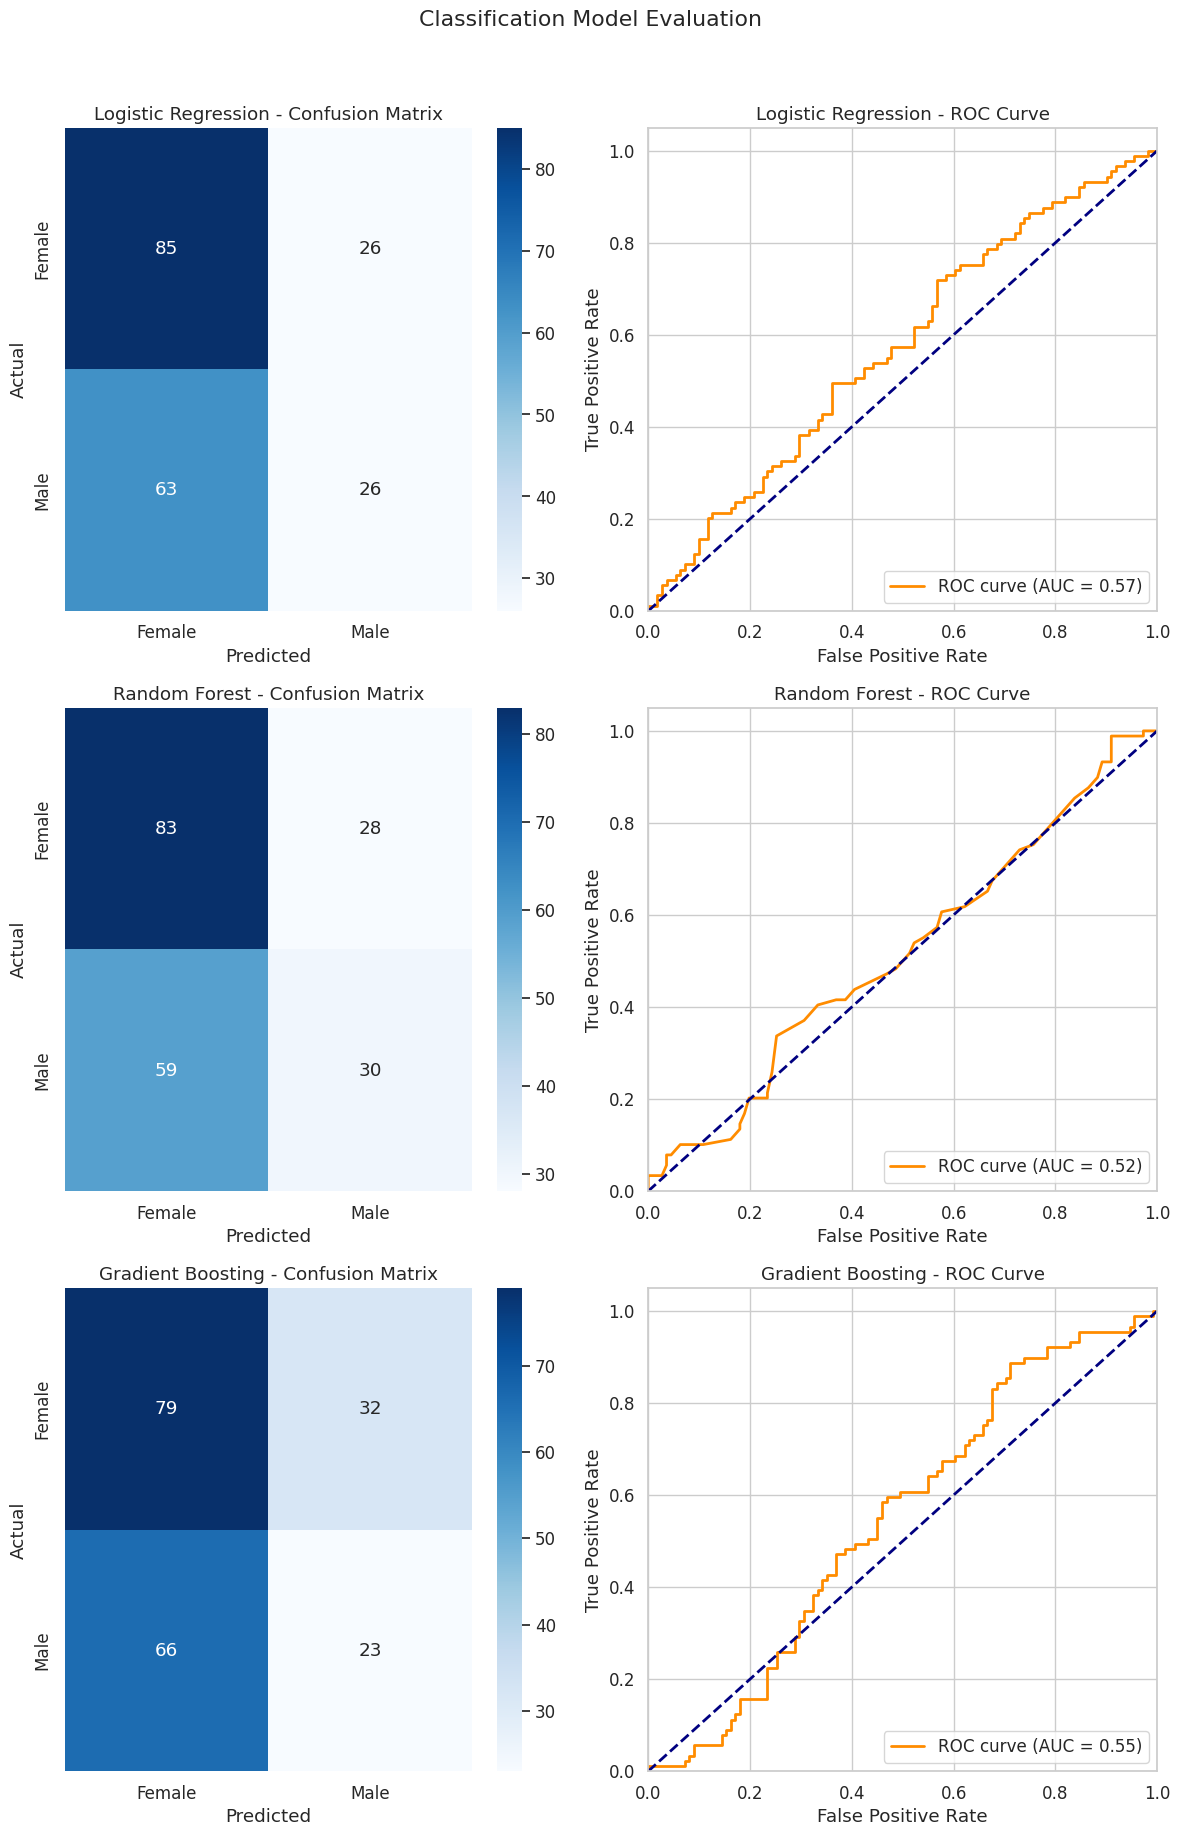

In [13]:
# Visualizar Confusion Matriz y ROC Curva para cada modelo
fig, axs = plt.subplots(len(classification_results), 2, figsize=(12, 6 * len(classification_results)))
fig.suptitle('Classification Model Evaluation', y=1.02)

for i, (name, metrics) in enumerate(classification_results.items()):
    # Confusion Matriz
    cm = metrics['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[i, 0])
    axs[i, 0].set_title(f'{name} - Confusion Matrix')
    axs[i, 0].set_xlabel('Predicted')
    axs[i, 0].set_ylabel('Actual')
    axs[i, 0].set_xticklabels(['Female', 'Male'])
    axs[i, 0].set_yticklabels(['Female', 'Male'])

    # ROC
    fpr = metrics['fpr']
    tpr = metrics['tpr']
    roc_auc = metrics['auc']

    if fpr is not None and tpr is not None and roc_auc is not None:
        axs[i, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        axs[i, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axs[i, 1].set_xlim([0.0, 1.0])
        axs[i, 1].set_ylim([0.0, 1.05])
        axs[i, 1].set_xlabel('False Positive Rate')
        axs[i, 1].set_ylabel('True Positive Rate')
        axs[i, 1].set_title(f'{name} - ROC Curve')
        axs[i, 1].legend(loc="lower right")
    else:
        axs[i, 1].set_title(f'{name} - ROC Curve (Not Available)')
        axs[i, 1].text(0.5, 0.5, 'Model does not support predict_proba',
                       horizontalalignment='center', verticalalignment='center', transform=axs[i, 1].transAxes)


plt.tight_layout()
plt.show()

## Resumen:

### Hallazgos Clave del Análisis de Datos

*   La variable objetivo 'Gender' (Género) fue identificada exitosamente como binaria ('Female': 571, 'Male': 429) y separada para la clasificación.
*   El DataFrame de características `X` fue preparado eliminando la variable objetivo y las columnas relacionadas con ventas, resultando en 12 características.
*   Se entrenaron y evaluaron tres modelos de clasificación (Regresión Logística, Random Forest, Gradient Boosting).
*   Los modelos mostraron un rendimiento variable en la clasificación del 'Gender'.
*   Se calcularon las puntuaciones AUC: Regresión Logística (0.572), Random Forest (0.516) y Gradient Boosting (0.548). Estos valores sugieren que ninguno de los modelos tuvo un rendimiento significativamente mejor que el azar (AUC = 0.5) al predecir el género basándose en las características disponibles.
*   Las matrices de confusión y las curvas ROC fueron visualizadas exitosamente para cada modelo, proporcionando una comparación visual de su rendimiento de clasificación y las compensaciones.

### Insights o Próximos Pasos

*   Las bajas puntuaciones AUC indican que las características seleccionadas no son predictores fuertes del género. Se necesita realizar ingeniería de características adicional o explorar otras columnas potencialmente relevantes en el dataset original para mejorar el rendimiento del modelo.
*   Dado el bajo rendimiento en esta tarea de clasificación específica (predecir Género), podría ser más interesante enfocar el análisis en otras preguntas de negocio o diferentes variables objetivo que puedan ser mejor predichas por los datos disponibles.

## Contenido para Presentación: Análisis y Predicción en Supermercado

### 1. Introducción y Objetivos del Proyecto

*   **Título:** Análisis y Predicción de Ventas en una Tienda de Retail / Supermercado
*   **Objetivo Principal:** Analizar el dataset de ventas de un supermercado para comprender patrones, identificar factores clave que influyen en las ventas y construir modelos predictivos (inicialmente regresión de ventas, luego exploramos clasificación de género) para obtener insights y potencialmente optimizar operaciones.
*   **Preguntas Clave a Responder:**
    *   ¿Cuál es la distribución de las ventas totales?
    *   ¿Existe correlación entre las variables numéricas?
    *   ¿Cómo varían las ventas según el género, tipo de cliente, método de pago o sucursal?
    *   ¿Qué tan bien podemos predecir las ventas basándonos en otras características?
    *   ¿Podemos predecir características demográficas (como el género) basándonos en los datos de compra?

### 2. Descripción del Conjunto de Datos

*   **Origen:** Archivo CSV 'SuperMarket Analysis.csv'.
*   **Tamaño:** 1000 filas, 17 columnas.
*   **Variables Clave:**
    *   `Invoice ID`: Identificador único de la factura.
    *   `Branch`: Sucursal (Alex, Giza, Naypyitaw).
    *   `City`: Ciudad.
    *   `Customer type`: Tipo de cliente (Member, Normal).
    *   `Gender`: Género (Female, Male).
    *   `Product line`: Línea de producto.
    *   `Unit price`: Precio unitario.
    *   `Quantity`: Cantidad comprada.
    *   `Tax 5%`: Impuesto aplicado.
    *   `Sales`: Total de ventas (Precio Unitario * Cantidad + Impuesto).
    *   `Date`, `Time`: Fecha y hora de la compra.
    *   `Payment`: Método de pago.
    *   `cogs`: Costo de los bienes vendidos.
    *   `gross margin percentage`: Margen de ganancia bruto en porcentaje.
    *   `gross income`: Ingreso bruto (Ventas - cogs).
    *   `Rating`: Calificación del cliente.
*   **Calidad de Datos:** No se encontraron valores nulos en el dataset cargado.

### 3. Principales Análisis y Hallazgos

*   **Distribución de Ventas (`Sales`):** (Basado en Celda 2)
    *   La mayoría de las ventas se concentran en rangos de montos bajos a moderados.
    *   La distribución es ligeramente sesgada a la derecha.
    *   El boxplot mostró la distribución de los cuartiles y la presencia de algunos valores atípicos (ventas de monto más alto).
*   **Correlación entre Variables Numéricas:** (Basado en Celda 3)
    *   Existe una correlación muy fuerte y positiva entre `Unit price`, `Quantity`, `Tax 5%`, `Sales`, `cogs` y `gross income`. Esto es esperado ya que estas variables están interrelacionadas por la fórmula de ventas y costo.
    *   `Rating` muestra baja correlación con las variables relacionadas con ventas.
*   **Ventas por Categoría (Boxplots):** (Basado en Celda 4)
    *   Se visualizó la distribución de ventas para cada categoría de Género, Tipo de Cliente, Método de Pago y Sucursal.
    *   Estos gráficos permiten comparar medianas, dispersión y rangos de ventas entre grupos (ej. ¿Las ventas medianas son diferentes entre clientes miembros y normales?).

*   **Modelado de Regresión (Predicción de Ventas):** (Basado en Celdas 5 y 6)
    *   Se prepararon los datos separando features y 'Sales' como target.
    *   Se aplicó preprocesamiento (escalado numérico, one-hot encoding categórico) mediante un pipeline.
    *   Se evaluaron varios modelos de regresión (Lineal, KNN, Árboles, XGBoost, LightGBM) utilizando validación cruzada (R²).
    *   Los modelos basados en árboles (Decision Tree, Random Forest, XGBoost, LightGBM) mostraron un rendimiento muy alto (R² cercano a 1), lo que sugiere una fuerte relación predictiva entre las features y las ventas.

*   **Modelado de Clasificación (Predicción de Género):** (Basado en Celdas 7, 8 y 9)
    *   Se re-enfocó la tarea para predecir 'Gender' como variable objetivo binaria.
    *   Se entrenaron modelos de clasificación (Regresión Logística, Random Forest, Gradient Boosting) con el mismo preprocesamiento.
    *   Se evaluaron con métricas de clasificación: classification report, confusion matrix, ROC curve y AUC.
    *   Las puntuaciones AUC (0.516 - 0.572) fueron cercanas a 0.5, indicando que los modelos tuvieron un rendimiento similar al azar al predecir el género con las features utilizadas.

### 4. Visualizaciones Clave

*   Incluir los gráficos generados en el Colab:
    *   Histograma y Boxplot de 'Sales' (Celda 2).
    *   Heatmap de la Matriz de Correlación (Celda 3).
    *   Boxplots de Ventas por Categoría (Celda 4).
    *   Matrices de Confusión para los modelos de Clasificación (Celda 9).
    *   Curvas ROC para los modelos de Clasificación (Celda 9).
*   Asegúrate de que cada visualización tenga un título claro y, si es posible, una breve descripción de lo que muestra.

### 5. Conclusiones y Recomendaciones

*   **Conclusiones:**
    *   El dataset no presenta valores nulos y está listo para el análisis.
    *   Existe una alta correlación entre las variables directamente relacionadas con el cálculo de ventas.
    *   Los boxplots de ventas por categoría brindan insights sobre las diferencias en el comportamiento de compra entre grupos.
    *   La predicción de ventas totales (`Sales`) parece ser muy precisa con los modelos evaluados, especialmente los basados en árboles.
    *   La predicción del género basándose en las features disponibles (sin incluir género) no fue exitosa (AUC cercano a 0.5), lo que indica que estas características no son buenos predictores del género del cliente en este dataset.

*   **Recomendaciones / Próximos Pasos:**
    *   **Para Predicción de Ventas:** Si el objetivo es predecir ventas, los modelos como XGBoost o LightGBM son prometedores, pero es crucial investigar el posible sobreajuste dado el alto R². Se podría explorar la optimización de hiperparámetros o la validación en un conjunto de datos de prueba completamente independiente.
    *   **Para Clasificación (si el objetivo es predecir género u otra variable categórica):** Explorar ingeniería de características adicionales. Las columnas 'Date' y 'Time' podrían ser útiles si se extraen características de tiempo (día de la semana, hora del día, mes) que puedan estar relacionadas con el género o el comportamiento de compra. Investigar si otras columnas categóricas o numéricas (no utilizadas aún) tienen poder predictivo para la tarea de clasificación.
    *   **Re-evaluar el Objetivo:** Dada la dificultad para predecir el género, considerar si hay otras preguntas de negocio más relevantes que los datos puedan responder de manera más efectiva (ej. Predecir qué línea de producto comprará un cliente, predecir la calificación, segmentación de clientes).
    *   **Despliegue:** Si se elige un modelo de predicción de ventas, el siguiente paso sería prepararlo para su despliegue y uso en un entorno de producción.

### Contenido para el Archivo README.md

*   **Título:** Análisis y Predicción de Ventas en una Tienda de Retail
*   **Descripción:** Este proyecto contiene el análisis exploratorio de datos (EDA) y el desarrollo de modelos predictivos (regresión y clasificación) utilizando el dataset de ventas de un supermercado. El objetivo es obtener insights sobre los patrones de compra y evaluar la capacidad de predecir variables clave.
*   **Estructura del Repositorio:**
    *   `/data`: Contiene el conjunto de datos (`SuperMarket Analysis.csv`).
    *   `/notebooks`: Incluye los notebooks de Jupyter/Colab utilizados para el EDA, preprocesamiento y modelado (`EDA.ipynb`, `Preprocessing.ipynb`, `Benchmarking.ipynb` - estos nombres son sugerencias, puedes ajustarlos según tus archivos).
    *   `/reports`: Almacena los resultados clave, como informes de clasificación y visualizaciones generadas (`classification_report.txt`, `confusion_matrix.png`, `roc_curve.png` - guarda las imágenes generadas).
    *   `/presentation`: Carpeta para la presentación de resultados (ej. `onepage_presentation.pptx`).
    *   `README.md`: Este archivo, proporcionando una descripción general del proyecto.
*   **Instrucciones para Ejecutar:**
    1.  Clona el repositorio: `git clone <URL_del_repositorio>`
    2.  Navega al directorio del proyecto.
    3.  Asegúrate de tener Python y las librerías necesarias instaladas (pandas, matplotlib, seaborn, scikit-learn, xgboost, lightgbm). Puedes instalarlas usando pip (ej. `pip install pandas matplotlib seaborn scikit-learn xgboost lightgbm`).
    4.  Ejecuta los notebooks en orden (si aplica) utilizando Jupyter Notebook, JupyterLab o Google Colab.
*   **Autores:** [Tu Nombre]
*   **Licencia:** [Por ejemplo, Licencia MIT - especifica la licencia bajo la cual compartes tu trabajo]

### Contenido para el Archivo README.md

*   **Título:** Análisis y Predicción de Ventas en una Tienda de Retail
*   **Descripción:** Este proyecto contiene el análisis exploratorio de datos (EDA) y el desarrollo de modelos predictivos (regresión y clasificación) utilizando el dataset de ventas de un supermercado. El objetivo es obtener insights sobre los patrones de compra y evaluar la capacidad de predecir variables clave.
*   **Estructura del Repositorio:**
    *   `/data`: Contiene el conjunto de datos (`SuperMarket Analysis.csv`).
    *   `/notebooks`: Incluye los notebooks de Jupyter/Colab utilizados para el EDA, preprocesamiento y modelado (`EDA.ipynb`, `Preprocessing.ipynb`, `Benchmarking.ipynb` - estos nombres son sugerencias, puedes ajustarlos según tus archivos).
    *   `/reports`: Almacena los resultados clave, como informes de clasificación y visualizaciones generadas (`classification_report.txt`, `confusion_matrix.png`, `roc_curve.png` - guarda las imágenes generadas).
    *   `/presentation`: Carpeta para la presentación de resultados (ej. `onepage_presentation.pptx`).
    *   `README.md`: Este archivo, proporcionando una descripción general del proyecto.
*   **Instrucciones para Ejecutar:**
    1.  Clona el repositorio: `git clone <URL_del_repositorio>`
    2.  Navega al directorio del proyecto.
    3.  Asegúrate de tener Python y las librerías necesarias instaladas (pandas, matplotlib, seaborn, scikit-learn, xgboost, lightgbm). Puedes instalarlas usando pip (ej. `pip install pandas matplotlib seaborn scikit-learn xgboost lightgbm`).
    4.  Ejecuta los notebooks en orden (si aplica) utilizando Jupyter Notebook, JupyterLab o Google Colab.
*   **Autores:** [Tu Nombre]
*   **Licencia:** [Por ejemplo, Licencia MIT - especifica la licencia bajo la cual compartes tu trabajo]